<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S3_1_1_Californian_Housing_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Californian Housing Market




Dans Sklearn, il y a des datasets qui sont déjà pré-enregistré qu'on peut utiliser à nos fins pour appliquer des algorithmes de Machine Learning. Tentons de regarder le premier avec _Boston Housing Market_

1. Importez les librairies usuelles

In [0]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as plt

    2. Utilisez les lignes de codes suivantes afin de récupérer les données sur les prix de l’immobilier en Californie :
    
```
from sklearn import datasets
data = datasets.california_housing.fetch_california_housing()
```

In [2]:
from sklearn import datasets
data = datasets.california_housing.fetch_california_housing()

3. Utilisez UNE ligne de code pour obtenir les noms des différentes variables explicatives

In [16]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

4. On préfèrerait avoir ces données dans un DataFrame. Utilisez la librairies Pandas pour trouver un moyen de mettre ces données dans un DataFrame 

Vous pouvez aller plus particulièrement regarder le lien suivant : 

[DataFrame en Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

In [6]:
dataset = pd.DataFrame(data.data, columns = data.feature_names)
dataset["Price"] = data.target
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


5. Visualisez l'impact de chacune des variables sur le prix avec Seaborn 

a. Faites un nuage de points pour exprimer _MedInc_ en fonction de _Price_

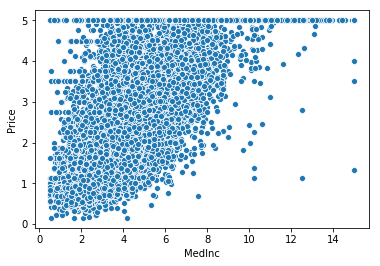

In [7]:
sns.scatterplot(x= dataset.MedInc, y = dataset.Price)

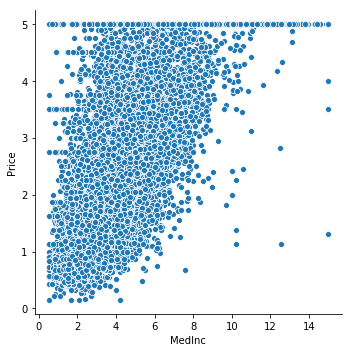

b. Regardez maintenant l'influence de l'âge de la maison par rapport au prix

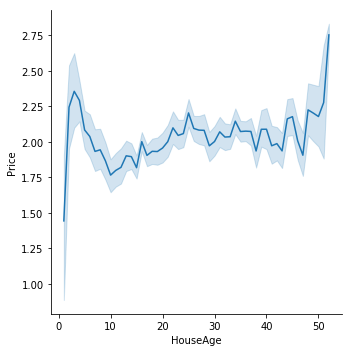

In [8]:
sns.relplot(x = "HouseAge", y = "Price", data = dataset,kind="line")

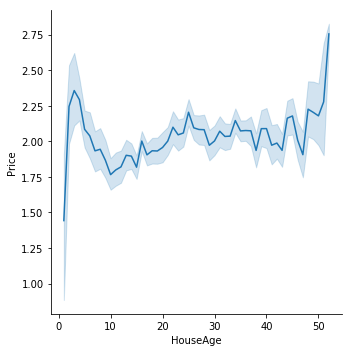

c. Trouvez un moyen de regarder la tendance entre _AveRooms_ & _Price_

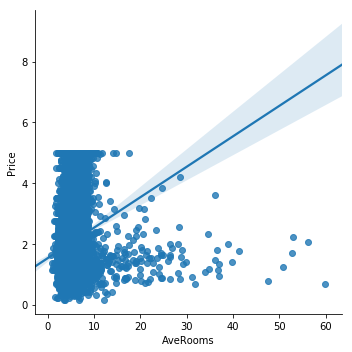

In [14]:
data_filtered = dataset[dataset.AveRooms <=60]
sns.lmplot(x= "AveRooms", y = "Price", data = data_filtered)
#sns.scatterplot(x= "AveRooms", y = "Price", data = data_filtered)

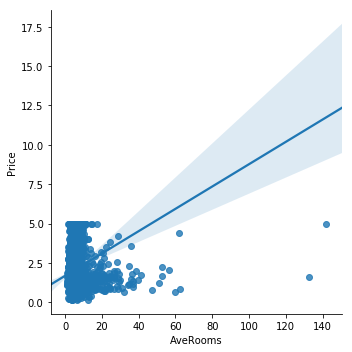

d. Faites de même avec _AveBedrms_ & _Price_

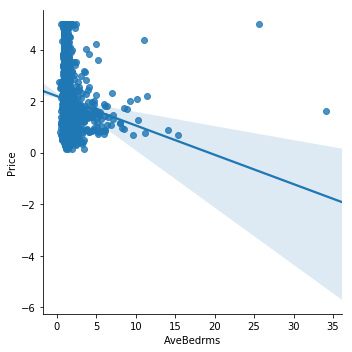

In [15]:
sns.lmplot(x= "AveBedrms", y = "Price", data = dataset)

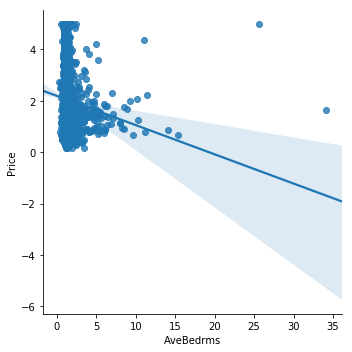

e. Faites de même avec la population. Simplement, filtrez le dataset pour qu'il ne contienne uniquement les valeurs pour lesquelles la population est inférieur à 15000

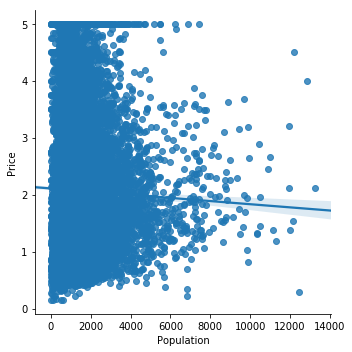

In [19]:
data_filtered = dataset[dataset.Population < 15000]
sns.lmplot(x= "Population", y = "Price", data = data_filtered)

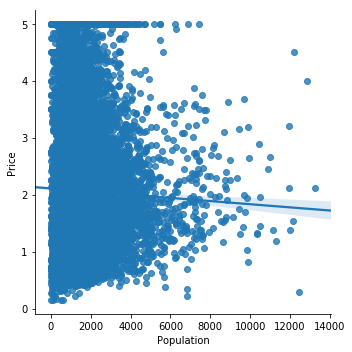

f. Faites de même avec _AveOccup_. Cette fois filtrez la colonne pour ne garder unqiuement les valeurs inférieures à 100

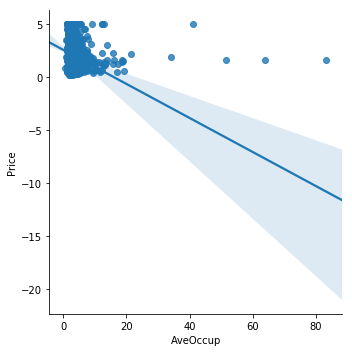

In [20]:
data_filtered = dataset[dataset.AveOccup < 100]
sns.lmplot(x= "AveOccup", y = "Price", data = data_filtered)

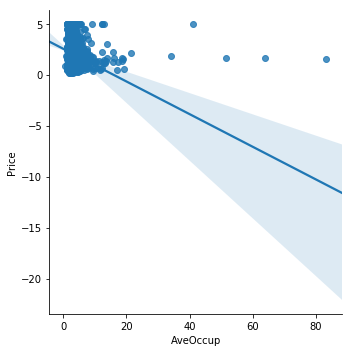

6. Coupez votre dataset en deux. Vous aurez ```X``` comprenant les variables explicatives et  ```y``` contenant la variable cible

In [0]:
x1 = dataset.iloc[:,:-1]
y1 = dataset.Price


7. Maintenant, séparez votre dataset en un *train_set* et un *test_set*. On utilisera scikitlearn pour cela 

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x1, 
                                                    y1,
                                                    test_size=0.25,
                                                    random_state=0
                                                    )

8. A votre avis, a-t-on besoin d'une phase de normalisation ? Si oui, faites là via scikitlearn

In [0]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)



9. Créez votre modèle de régression linéaire via scikit learn

In [0]:
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
model = classifier.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

10. Affichez votre score R2 via scikitlearn sur vos données de test. Commentez les résultats de votre score. 

In [0]:
y_pred = classifier.predict(X_train)

In [72]:
import sklearn.metrics
sklearn.metrics.r2_score(y_train, y_pred)

#classifier.score(X_test,y_test)

0.6109633715458154

0.608584318389226

11. Affichez les coefficients de chacune des variables explicatives 

In [51]:
coeff = classifier.coef_
coeff

array([ 0.83189945,  0.1209374 , -0.26175157,  0.30405212, -0.00873559,
       -0.02984442, -0.89236538, -0.86385031])

array([[ 0.82114346,  0.11747658, -0.26493939,  0.30759428, -0.00165817,
        -0.04170754, -0.90944796, -0.87886524]])

12. Créez un DataFrame dans lequel vous aurez les colonnes qui se rapportent au bon coefficient

In [68]:
coef_dict = {}
for coef, feat in zip(classifier.coef_, dataset.columns):
    coef_dict[feat] = coef
coef_df = pd.DataFrame.from_dict(coef_dict, orient='index', columns= ["coefficients"])
coef_df

,coefficients
MedInc,0.831899
HouseAge,0.120937
AveRooms,-0.261752
AveBedrms,0.304052
Population,-0.008736
AveOccup,-0.029844
Latitude,-0.892365
Longitude,-0.863850


,coefficients
MedInc,0.821143
HouseAge,0.117477
AveRooms,-0.264939
AveBedrms,0.307594
Population,-0.001658
AveOccup,-0.041708
Latitude,-0.909448
Longitude,-0.878865


13. ordonnez ce dataset par ordre décroissant. Que pouvez vous maintenant conclure ? 

In [69]:
coef_df.sort_values("coefficients", 0, False, True)
coef_df

,coefficients
MedInc,0.831899
AveBedrms,0.304052
HouseAge,0.120937
Population,-0.008736
AveOccup,-0.029844
AveRooms,-0.261752
Longitude,-0.863850
Latitude,-0.892365


,coefficients
MedInc,0.821143
AveBedrms,0.307594
HouseAge,0.117477
Population,-0.001658
AveOccup,-0.041708
AveRooms,-0.264939
Longitude,-0.878865
Latitude,-0.909448


---> Les colonnes ayant le plus d'influence sont les MedInc, la Longitude & Latitude ainsi que le nombre de lit.  

14. En général, on évite de regarder les coefficients pour déterminer l'importance des features. On va plutôt utiliser quelque chose que ```f_regression```

Regardez la documentation de sckitlearn pour essayer de réussir à mettre en place cette metric

In [77]:
import sklearn.feature_selection
fsc= sklearn.feature_selection.f_regression(x1, y1, center=True)
fsc

(array([1.85565716e+04, 2.32841479e+02, 4.87757462e+02, 4.51085756e+01,
        1.25474103e+01, 1.16353421e+01, 4.38005453e+02, 4.36989761e+01]),
 array([0.00000000e+000, 2.76186068e-052, 7.56924213e-107, 1.91258939e-011,
        3.97630785e-004, 6.48344237e-004, 2.93985929e-096, 3.92332207e-011]))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([1.85565716e+04, 2.32841479e+02, 4.87757462e+02, 4.51085756e+01,
        1.25474103e+01, 1.16353421e+01, 4.38005453e+02, 4.36989761e+01]),
 array([0.00000000e+000, 2.76186068e-052, 7.56924213e-107, 1.91258939e-011,
        3.97630785e-004, 6.48344237e-004, 2.93985929e-096, 3.92332207e-011]))

15. Mettez ensuite vos résultats dans un dataframe pour qu'on puisse les interpréter 

In [79]:
fsc_dict = {}
for coef, feat in zip(fsc[0], dataset.columns):
    fsc_dict[feat] = coef
fsc_df = pd.DataFrame.from_dict(fsc_dict, orient='index', columns= ["f-score"])
fsc_df["p-value"] = fsc[1]
fsc_df

,f-score,p-value
MedInc,18556.571631,0.000000e+00
HouseAge,232.841479,2.761861e-52
AveRooms,487.757462,7.569242e-107
AveBedrms,45.108576,1.912589e-11
Population,12.547410,3.976308e-04
AveOccup,11.635342,6.483442e-04
Latitude,438.005453,2.939859e-96
Longitude,43.698976,3.923322e-11


,f-score,p-value
MedInc,18556.571631,0.000000e+00
AveRooms,487.757462,7.569242e-107
Latitude,438.005453,2.939859e-96
HouseAge,232.841479,2.761861e-52
AveBedrms,45.108576,1.912589e-11
Longitude,43.698976,3.923322e-11
Population,12.547410,3.976308e-04
AveOccup,11.635342,6.483442e-04


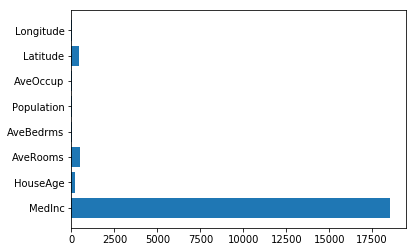

In [91]:
import matplotlib.pyplot as plt

# Création de données aléatoires
names = fsc_df.index.to_list()
values = fsc[0]

# Création du Barplot

plt.barh(names, values)
plt.show()

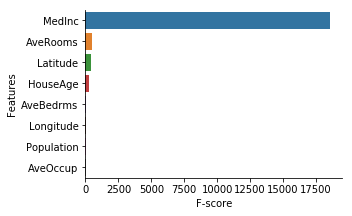

---> Ici, on voit que le classement des features est légèremetn différents. C'est sur ce f-score que l'on se fiera pour la suite des exercices. 

**Questions supplémentaires**

  
 

16. Prenez un échantillon de votre dataset via ```.sample()``` On prendra 150 valeurs

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
863,5.8151,6.0,6.402616,1.042151,2071.0,3.010174,37.58,-122.00,2.956
7966,2.2381,35.0,4.180812,1.092251,774.0,2.856089,33.86,-118.19,1.375
8184,5.7389,35.0,6.010767,0.995962,2134.0,2.872140,33.78,-118.10,2.518
4693,4.2500,52.0,5.736979,1.138021,899.0,2.341146,34.07,-118.37,4.869
20547,2.1927,43.0,4.329949,1.011844,1820.0,3.079526,38.68,-121.77,1.079


17. Faites un reset des index pour avoir une suite de nombre comprise en 0 et la taille du dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,5.8151,6.0,6.402616,1.042151,2071.0,3.010174,37.58,-122.00,2.956
1,2.2381,35.0,4.180812,1.092251,774.0,2.856089,33.86,-118.19,1.375
2,5.7389,35.0,6.010767,0.995962,2134.0,2.872140,33.78,-118.10,2.518
3,4.2500,52.0,5.736979,1.138021,899.0,2.341146,34.07,-118.37,4.869
4,2.1927,43.0,4.329949,1.011844,1820.0,3.079526,38.68,-121.77,1.079


  17. Utilisez l’aide suivante afin de traduire la longitude et la latitude des données pour trouver les villes correspondant à chaque observation : [geopy](https://pypi.org/project/geopy)

'Berlin'

{'house_number': '864', 'road': 'Vanda Way', 'suburb': 'Niles District', 'city': 'Fremont', 'county': 'Alameda County', 'state': 'California', 'postcode': '94536', 'country': 'USA', 'country_code': 'us'}
{'house_number': '298', 'road': 'South Street', 'suburb': 'North Long Beach', 'city': 'Long Beach', 'county': 'Los Angeles County', 'state': 'California', 'postcode': '90805', 'country': 'USA', 'country_code': 'us'}
{'house_number': '6890', 'road': 'East 10th Street', 'suburb': 'Los Altos', 'city': 'Long Beach', 'county': 'Los Angeles County', 'state': 'California', 'postcode': '90815', 'country': 'USA', 'country_code': 'us'}
{'house_number': '6588', 'road': 'Colgate Avenue', 'neighbourhood': 'Carthay Circle', 'suburb': 'Hollywood', 'city': 'LA', 'county': 'Los Angeles County', 'state': 'California', 'postcode': '90048', 'country': 'USA', 'country_code': 'us'}
{'house_number': '847', 'road': 'North Street', 'city': 'Woodland', 'county': 'Yolo County', 'state': 'California', 'postcode':

 18. S'il y a des villes que vous n'avez pas trouvées, remplacez la valeur de la cellule par ```unknown```

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


19. Trouvez le top 10 des villes qui ont les prix moyens les plus chers

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
City,,,,,,,,,
La Cañada Flintridge,9.8413,32.0,7.170040,1.014845,4353.0,2.937247,34.220000,-118.190000,5.000010
Sausalito,6.7669,35.0,5.168561,1.018939,969.0,1.835227,37.860000,-122.490000,5.000010
Costa Mesa,7.8496,39.0,6.528889,1.004444,553.0,2.457778,33.630000,-117.920000,4.908000
SF,3.6675,52.0,4.041590,1.068281,1544.0,1.730212,37.786667,-122.433333,4.861007
Altadena,9.5320,50.0,7.114428,0.925373,620.0,3.084577,34.190000,-118.110000,4.833000
Palo Alto,7.3023,35.0,6.661710,0.994424,1405.0,2.611524,37.430000,-122.110000,4.513000
Redondo Beach,6.0308,38.0,5.857778,1.053333,547.0,2.431111,33.820000,-118.380000,4.167000
Larkspur,6.6125,42.0,6.256484,1.043228,887.0,2.556196,37.930000,-122.530000,3.932000
Corte Madera,3.8750,45.0,4.664634,0.987805,608.0,1.853659,37.920000,-122.530000,3.908000


20. Affichez ceci dans un graphique 

/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


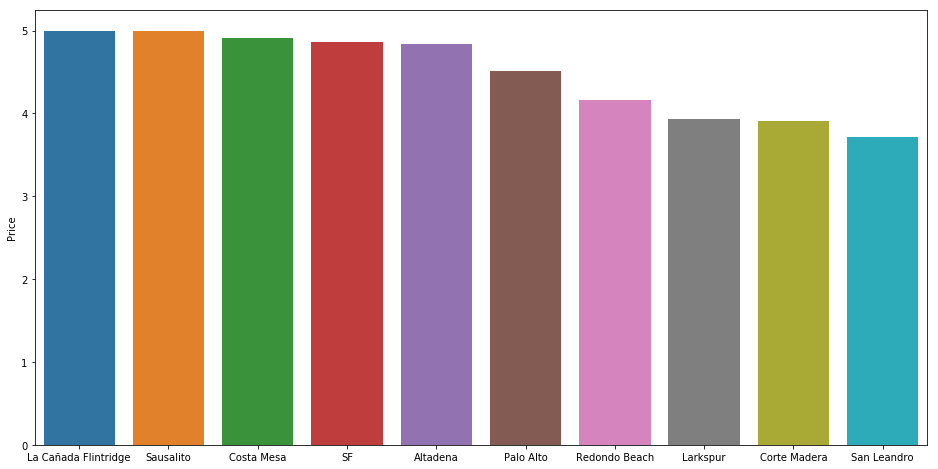

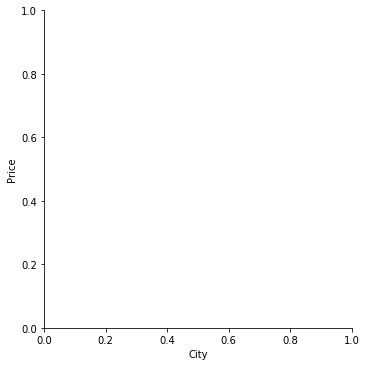

21. Refaites un modèle de régression linéaire en incluant les villes comme variables explicative. Quel score trouvez vous ?

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

0.6705042435805343

22. Notre modèle est globalement moins bon. A votre avis pourquoi ? 

----> Nous avons beaucoup moins de données. Il faudrait qu'on prenne un sample plus grand pour que notre modèle aient de quoi s'entraîner correctement. 